<a href="https://colab.research.google.com/github/AagamanVarma/HeartDiseasePrediction/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload dataset to colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart.csv')

# Display first few rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Dataset Preprocessing and Cleaning


In [ ]:
# Display dataset shape (rows x columns)
print("Dataset shape:", df.shape)

# Show summary statistics for each column
print("\nSummary statistics:")
print(df.describe())

# Check for missing values in each column
print("\nMissing values:")
print(df.isnull().sum())

# View column names
print("\nColumn names:")
print(df.columns.tolist())


Dataset shape: (918, 12)

Summary statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

Missing values:


Prepare features and target variable for model training

In [ ]:
# Target variable: 'HeartDisease' column (0 = no, 1 = yes)
y = df['HeartDisease']

# Drop the target column from feature set
X = df.drop('HeartDisease', axis=1)

# One-Hot Encode categorical features (creates binary columns for categories)
X = pd.get_dummies(X, drop_first=True)  # drop_first avoids multicollinearity

# Check the shape after encoding
print("Final feature set shape:", X.shape)
X.head()


Final feature set shape: (918, 15)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


Train-test-split and scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()

# Fit on training data only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model training and evaluation


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 5.1: Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5.2: Make predictions
y_pred = model.predict(X_test_scaled)

# Step 5.3: Evaluate performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Confusion Matrix:
[[67 10]
 [17 90]]


train multiple models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 6: Compare multiple classifiers

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8533
Random Forest Accuracy: 0.8478
KNN Accuracy: 0.8533
SVM Accuracy: 0.8750
Gradient Boosting Accuracy: 0.8641


Among all classifiers tested, the Support Vector Machine (SVM) model achieved the highest accuracy (87.50%), followed closely by ensemble models such as Random Forest and Gradient Boosting. These results demonstrate the effectiveness of non-linear classifiers for predicting heart disease.

Explaining model with SHAP (SHapley Additive exPlanations)

  0%|          | 0/50 [00:00<?, ?it/s]

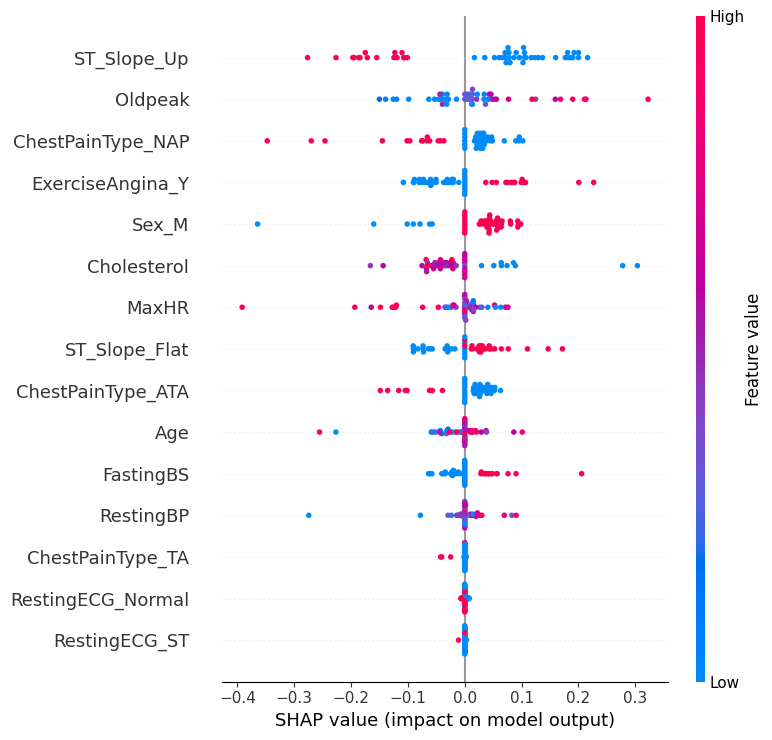

In [ ]:
import shap

# Create an explainer (use KernelExplainer for SVM)
explainer = shap.KernelExplainer(model.predict, X_train_scaled[:100])  # Use a small background set

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test_scaled[:50])  # Explain first 50 samples

# Plot summary plot to show feature importance globally
shap.summary_plot(shap_values, X_test.iloc[:50], feature_names=X.columns)

